# HOW TO get and visualize the scheduler timing information of a Quantum Circuit

In order to have the visualizer avialale in the notebook, please checkout the branch [RoyElkabetz:re-sched-vis](https://github.com/RoyElkabetz/qiskit-ibm-runtime/tree/re-sched-vis). Also notice that a special Primitives image is being set for execution. This new image should become part of main in the near future, and then the `image` key in the Sampler Options could be removed.

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.circuit import QuantumCircuit
from qiskit import transpile

import qiskit
import qiskit_ibm_runtime

print(f"qiskit: {qiskit.__version__}")
print(f"qiskit-ibm-runtime: {qiskit_ibm_runtime.__version__}")

qiskit: 2.1.2
qiskit-ibm-runtime: 0.42.0.dev1970+g4b4641046.d20250828


In [2]:
# Connect to backend
# backend_name = "test_heron_pok_1"
# service = QiskitRuntimeService()
backend_name = "test_heron_pok_1"
service = QiskitRuntimeService()
backend = service.backend(backend_name)

management.get:WARNING:2025-09-30 10:58:40,247: Loading default saved account


In [3]:
# Create a Bell circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [4]:
# Transpiling the circuit for the given backend
transpiled_circuits = []
transpiled_circuit = transpile(qc, backend)
transpiled_circuits.append(transpiled_circuit)

In [ ]:
# Generating samplers for backend targets
sampler = SamplerV2(backend)
sampler.options.experimental = {
    "execution": {"scheduler_timing": True},
}

In [7]:
# Submitting sampler jobs
sampler_job = sampler.run(transpiled_circuits)

In [8]:
print(
    f">>> {' Job ID:':<10}  {sampler_job.job_id()} ({sampler_job.status()})"
)

>>>  Job ID:    d3dv096lahfs73d0fngg (QUEUED)


In [9]:
result = sampler_job.result()
print(f">>> {' Job:':<10} {sampler_job.job_id()} finished with:\n{result}")

>>>  Job:      d3dv096lahfs73d0fngg finished with:
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}, 'compilation': {'scheduler_timing': {'timing': 'main,barrier,Qubit 2,0,0,barrier\nmain,barrier,Qubit 3,0,0,barrier\nmain,INIT_2,Qubit 2,10,2500,play\nmain,INIT_2,Qubit 2,9,2500,play\nmain,INIT_3,Qubit 3,10,2500,play\nmain,INIT_3,Qubit 3,9,2500,play\nmain,barrier,Qubit 2,2510,0,barrier\nmain,barrier,Qubit 3,2510,0,barrier\nmain,rz_2,Qubit 74,2510,0,shift_phase\nmain,rz_2,Qubit 2,2510,0,shift_phase\nmain,rz_2,Qubit 75,2510,0,shift_phase\nmain,sx_2,Qubit 2,2510,256,play\nmain,rz_2,Qubit 74,2766,0,shift_phase\nmain,rz_2,Qubit 2,2766,0,shift_phase\nmain,rz_2,Qubit 75,2766,0,shift_phase\nmain,rz_3,Qubit 3,2510,0,shift_phase\nmain,rz_3,Qubit 75,2510,0,shift_phase\nmain,rz_3,Qubit 76,2510,0,shift_phase\nmain,sx_3,Qubit 3,2510,256,play\nmain,rz_3,Qubit 3,2766,0,shift_phase\nmain,rz_3,Qubit 75,2766,0,shift_phas

In [10]:
# getting the circuit schedule timing
result[0].metadata["compilation"]["scheduler_timing"]["timing"]

'main,barrier,Qubit 2,0,0,barrier\nmain,barrier,Qubit 3,0,0,barrier\nmain,INIT_2,Qubit 2,10,2500,play\nmain,INIT_2,Qubit 2,9,2500,play\nmain,INIT_3,Qubit 3,10,2500,play\nmain,INIT_3,Qubit 3,9,2500,play\nmain,barrier,Qubit 2,2510,0,barrier\nmain,barrier,Qubit 3,2510,0,barrier\nmain,rz_2,Qubit 74,2510,0,shift_phase\nmain,rz_2,Qubit 2,2510,0,shift_phase\nmain,rz_2,Qubit 75,2510,0,shift_phase\nmain,sx_2,Qubit 2,2510,256,play\nmain,rz_2,Qubit 74,2766,0,shift_phase\nmain,rz_2,Qubit 2,2766,0,shift_phase\nmain,rz_2,Qubit 75,2766,0,shift_phase\nmain,rz_3,Qubit 3,2510,0,shift_phase\nmain,rz_3,Qubit 75,2510,0,shift_phase\nmain,rz_3,Qubit 76,2510,0,shift_phase\nmain,sx_3,Qubit 3,2510,256,play\nmain,rz_3,Qubit 3,2766,0,shift_phase\nmain,rz_3,Qubit 75,2766,0,shift_phase\nmain,rz_3,Qubit 76,2766,0,shift_phase\nmain,cz_3_2,Qubit 2,2766,21,play\nmain,cz_3_2,Qubit 3,2766,21,play\nmain,sx_2,Qubit 2,2787,256,play\nmain,rz_2,Qubit 74,3043,0,shift_phase\nmain,rz_2,Qubit 2,3043,0,shift_phase\nmain,rz_2,Qubit

### Visualize and Save

Checkout the [PR's](https://github.com/Qiskit/qiskit-ibm-runtime/pull/2361) docs to better understand the different input argument to `draw_circuit_schedule_timing()`.

In [11]:
from qiskit_ibm_runtime.visualization import draw_circuit_schedule_timing

circuit_schedule = (
    result[0]
    .metadata["compilation"]["scheduler_timing"]["timing"]
    .split("\n")
)
fig = draw_circuit_schedule_timing(
    circuit_schedule=circuit_schedule,
    included_channels=None,
    filter_readout_channels=False,
    filter_barriers=False,
    width=1000,
)

### AWGRX_Y definition
AWGR stands for Arbitrary Wave Generator Readout (AWGR) and is used for readout channels communication for measuring qubits,
as opposed to drive channels which are for driving the qubits. The `X` and `Y` arguments corresponds to the readout instrument id and the qubit number respectively.

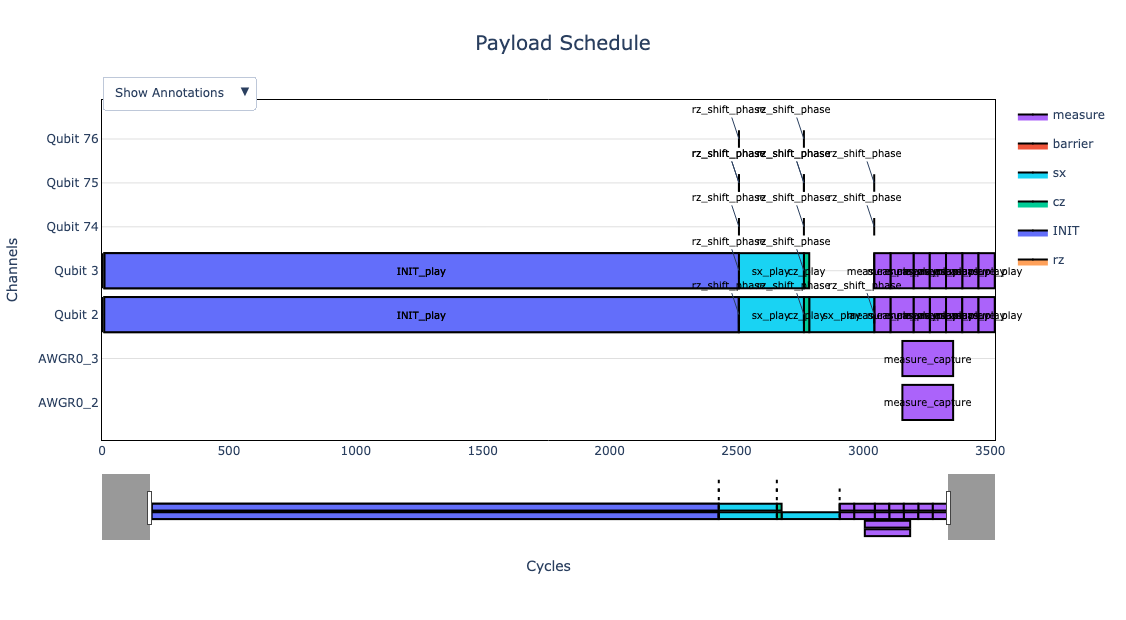

In [12]:
fig.show()